## 仿射轉換 灰階影像平移

In [44]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def rotate(image, degree):
    height, width, c = image.shape
    rotated_image = np.zeros_like(image)
    
    cos_theta = np.cos(np.radians(degree))  
    sin_theta = np.sin(np.radians(degree))  

    center_x = width // 2
    center_y = height // 2

    for new_y in range(height):  
        for new_x in range(width):  
            relative_x = new_x - center_x
            relative_y = new_y - center_y
            original_x = round(cos_theta * relative_x + sin_theta * relative_y + center_x)
            original_y = round(-sin_theta * relative_x + cos_theta * relative_y + center_y)

            if 0 <= original_x < width and 0 <= original_y < height:
                rotated_image[new_y, new_x] = image[original_y, original_x]
    return rotated_image



In [58]:
def bilinear_rotate(image, degree):
    height, width, c = image.shape
    Bilinear_rotated_image = np.zeros_like(image)
    cos_theta = np.cos(np.radians(degree))  
    sin_theta = np.sin(np.radians(degree))  
    center_x = width // 2
    center_y = height // 2

    for new_y in range(height):  
        for new_x in range(width):  
            relative_x = new_x - center_x
            relative_y = new_y - center_y
            original_x = cos_theta * relative_x + sin_theta * relative_y + center_x
            original_y = -sin_theta * relative_x + cos_theta * relative_y + center_y
            
            if 0 <= original_x < width - 1 and 0 <= original_y < height - 1:
                x1, y1 = int(original_x), int(original_y)
                x2, y2 = x1 + 1, y1 + 1

                f11 = image[y1, x1]
                f21 = image[y1, x2]
                f12 = image[y2, x1]
                f22 = image[y2, x2]

                b = original_x - x1
                a = original_y - y1
                interpolated_value = ((1 - b) * (f11 * (1 - a)  + f12 * a) + b  * (f21 * (1 - a) +  f22 * a ))
                Bilinear_rotated_image[new_y, new_x] = interpolated_value // 1

    return Bilinear_rotated_image



In [64]:
def translate(image, tx, ty):
    height, width, c = image.shape
    translated_image = np.zeros_like(image)
    for y in range(height):  
        for x in range(width):  # 遍歷圖像的每一列
                new_x = x+tx
                new_y = y+ty
                if 0 <= new_x < width and 0 <= new_y < height:
                    translated_image[new_y, new_x] = image[y, x]
    return translated_image

In [73]:
image_path = 'Lenna.jpg'
image = cv2.imread(image_path, 1)  
image = cv2.resize(image, (100, 100))  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

NN_rotated_image = rotate(image, 45)
bilinear_rotated_image = bilinear_rotate(image, 45)

plt.imshow(bilinear_rotated_image, cmap='gray')
plt.show()
plt.imshow(NN_rotated_image, cmap='gray')
plt.show()


plt.imshow(translate(image, 10, 10), cmap='gray')
plt.show()

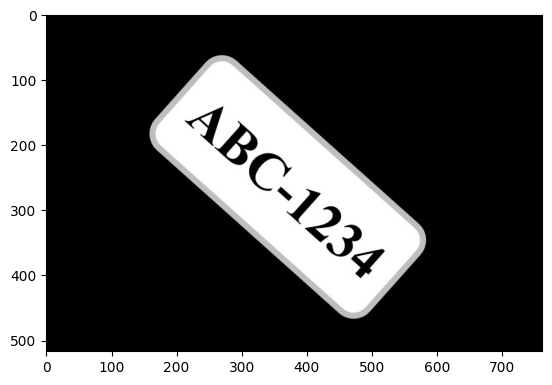

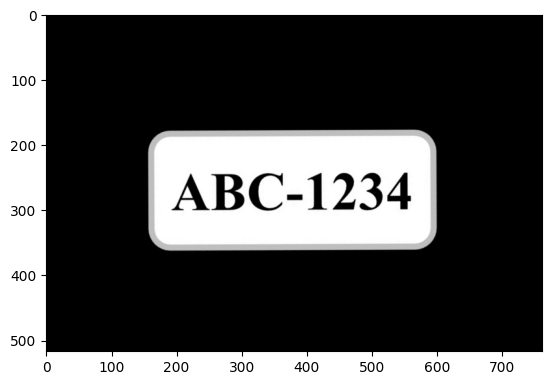

In [130]:
image_path = 'abc-123.jpg'
image = cv2.imread(image_path, 1)  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# x = -140, y = 30
translated_image = translate(image , -140, 30)
plt.imshow(translated_image, cmap='gray')
plt.show()

# theta = -42
rotated_image = bilinear_rotate(translated_image, -42)
plt.imshow(rotated_image, cmap='gray')
plt.show()